In [3]:
# Loading Packages
using LinearAlgebra, Parameters, Plots, LaTeXStrings, Latexify

# Loadifng Programs 
include("../JuliaCode/krusell_smith.jl")

# Set plot theme
theme(:vibrant)
default(fontfamily="Computer Modern", framestyle=:box) # LaTex-style

# Problem Set 5

This problem set implements an approximate equilibrium of a Aiyagari (1994) economy with aggregate uncertainty using the techniques in Krusell and Smith (1998).  

## Model Set-up

* a unit measure of agent
* the time period is one quarter
* preferences are given by:$$\sum_{t=0}^\infty \beta^t\log{c_t}$$
* $\beta = 0.99$
* The production technology is given by$$y_{t}=z_{t} k_{t}^{\alpha} l_{t}^{1-\alpha}$$
* $\alpha=0.36$
* aggregate technology shocks $z_{t} \in\left\{z_{g}=1.01, z_{b}=0.99\right\}$ are drawn from a Markov process.
* capital depreciates at rate $\delta=0.025$.
* agents have 1 unit of time.
* agents face idiosyncratic employment opportunities $\varepsilon_{t} \in\{0,1\}$ where $\varepsilon_{t}=1$ 
* if an agent is employed receives wage $w_{t} \bar{e}$ (where $\bar{e}=0.3271$ denotes labor efficiency per unit of time worked)

The probability of transition from state $(z, \varepsilon)$ to $\left(z^{\prime}, \varepsilon^{\prime}\right)$, denoted $\pi_{z z^{\prime} \varepsilon \varepsilon^{\prime}}$ must satisfy certain conditions:
$$
\pi_{z z^{\prime} 00}+\pi_{z z^{\prime} 01}=\pi_{z z^{\prime} 10}+\pi_{z z^{\prime} 11}=\pi_{z z^{\prime}}
$$
and
$$
u_{z} \frac{\pi_{z z^{\prime} 00}}{\pi_{z z^{\prime}}}+\left(1-u_{z}\right) \frac{\pi_{z z^{\prime} 10}}{\pi_{z z^{\prime}}}=u_{z^{\prime}}
$$
where $u_{z}$ denotes the fraction of those unemployed in state $z$ with $u_{g}=4 \%$ and $u_{b}=10 \%$. The other restrictions on $\pi_{z z^{\prime} \varepsilon \varepsilon^{\prime}}$ necessary to pin down the transition matrix are that: the average duration of good and bad times is 8 quarters; the average duration of unemployment spells is $1.5$ quarters in good times and $2.5$ quarters in bad times; and
$$
\frac{\pi_{g b 00}}{\pi_{g b}}=1.25 \cdot \frac{\pi_{b b 00}}{\pi_{b b}} \text { and } \frac{\pi_{b g 00}}{\pi_{b g}} 0.75 \cdot \frac{\pi_{g g 00}}{\pi_{g g}}
$$

We will start by defining a function that receives this data and returns the transition matrix. This function will be used to populate the primitives of the model at a later stage.

In [148]:
P, p = trans_mat([8.0, 8.0], [1.5, 2.5], [0.04, 0.1])

latexify(round.(P, digits=3))

L"\begin{equation}
\left[
\begin{array}{cccc}
0.851 & 0.123 & 0.583 & 0.094 \\
0.116 & 0.836 & 0.031 & 0.35 \\
0.024 & 0.002 & 0.292 & 0.031 \\
0.009 & 0.039 & 0.094 & 0.525 \\
\end{array}
\right]
\end{equation}
"

* Capital is the only asset to self insure fluctuations; households rent their capital $k_{t} \in[0, \infty)$ to firms and receive rate of return $r_{t}$. 
* Without loss of generality, we can consider one firm which hires $L_{t}$ units of labor efficiency units (so that $\left.L_{t}=\bar{e}\left(1-u_{t}\right)\right)$ and rents capital $K$ so that wages and rental rates are given by their marginal products:
$$
\begin{aligned}
w_{t} & \equiv w\left(K_{t}, L_{t}, z_{t}\right)=(1-\alpha) z_{t}\left(\frac{K_{t}}{L_{t}}\right)^{\alpha} \\
r_{t} & \equiv r\left(K_{t}, L_{t}, z_{t}\right)=\alpha z_{t}\left(\frac{K_{t}}{L_{t}}\right)^{\alpha-1}
\end{aligned}
$$


As in Krusell and Smith, approximate the true distribution $\Gamma_{t}$ over $\left(k_{t}, \varepsilon_{t}\right)$ in state $z_{t}$ by $I$ moments and let the law of motion for the moment be $$m^{\prime}=h_{I}\left(m, z, z^{\prime}\right)$$

### Initial Conditions
* Start with $z=z_g$
* 

### Initializing the model
Next we will initialize the model

In [3]:
prim, res, shocks = Initialize();

In [4]:
@time V_iterate(prim, res, shocks)

Iteration: 100 --- 645.9524668841859
Iteration: 200 --- 805567.2243489549
Iteration: 300 --- 1.0053331364039402e9
Iteration: 400 --- 1.25463796376942e12
Iteration: 500 --- 1.565765977211648e15
Iteration: 600 --- 1.9540482323908608e18
Iteration: 700 --- 2.4386176159669205e21
Iteration: 800 --- 3.0433516319235815e24
Iteration: 900 --- 3.798048982706001e27
Iteration: 1000 --- 4.73989792165965e30
 17.075168 seconds (366.73 M allocations: 10.218 GiB, 5.67% gc time, 1.91% compilation time)


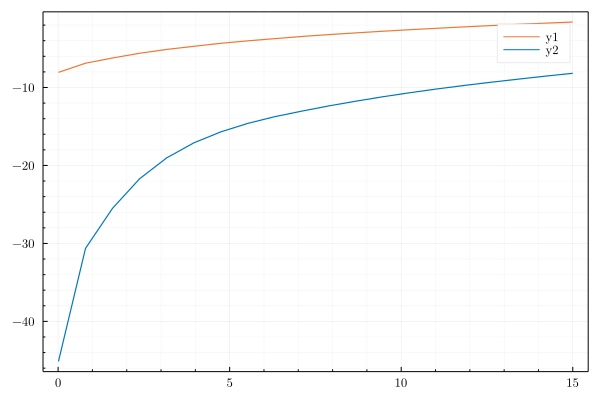

In [12]:
plot(prim.k_grid, res.val_fun[:,10,2,1])
plot!(prim.k_grid, res.val_fun[:,10,2,2])

Just to be clear this is a plot with a coarse grid:

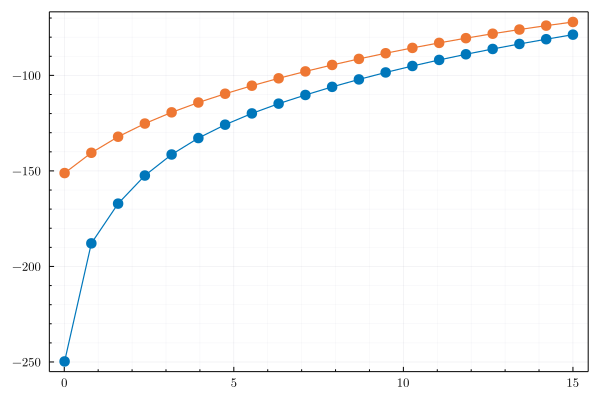

In [10]:
plot(prim.k_grid, res.val_fun[:,10,1,1], label="")
plot!(prim.k_grid, res.val_fun[:,10,1,2], label="")
scatter!(prim.k_grid, res.val_fun[:,10,1,1], label="", c=1)
scatter!(prim.k_grid, res.val_fun[:,10,1,2], label="", c=2)

I think the interpolated version will  look nicer

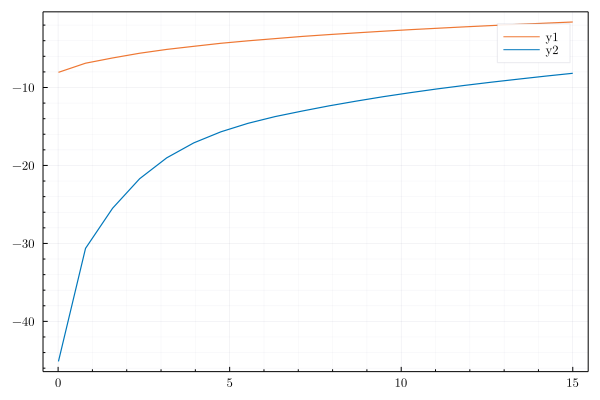

In [13]:
finner_grid = prim.k_min:0.01:prim.k_max
vf1 = res.val_fun_interp[(2,1)].(finner_grid, prim.K_grid[10])
vf2 = res.val_fun_interp[(2,2)].(finner_grid, prim.K_grid[10])

plot(finner_grid, vf1)
plot!(finner_grid, vf2)

Now testing simulation

In [26]:
include("../JuliaCode/krusell_smith.jl")
@time Simulation(prim, res, shocks)


2 0 15.000000000000002 14.469355735139933


LoadError: BoundsError: attempt to access 20×11 interpolate((::Vector{Float64},::Vector{Float64}), ::Matrix{Float64}, Gridded(Linear())) with element type Float64 at index [15.000000000000002, 14.469355735139933]

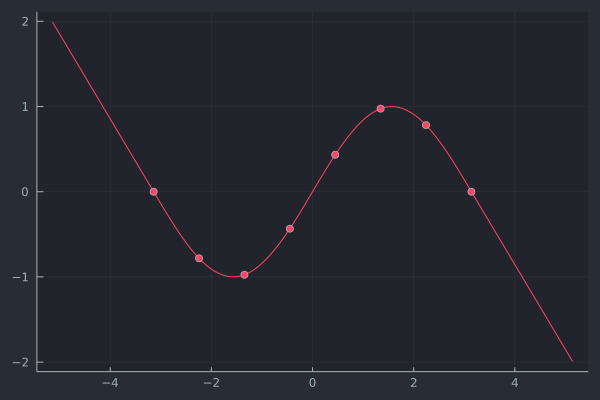

In [4]:
theme(:juno)
xs = range(-π, stop=π, length=8)
f(x) = sin(x)
A = [f(x) for x in xs]

x_dense = range(-π-2, stop=π+2, length=1000)

itp_line = CubicSplineInterpolation(xs, A, extrapolation_bc=Line());
plot(x_dense, itp_line.(x_dense), label="")
scatter!(xs, A, label="", c=1)

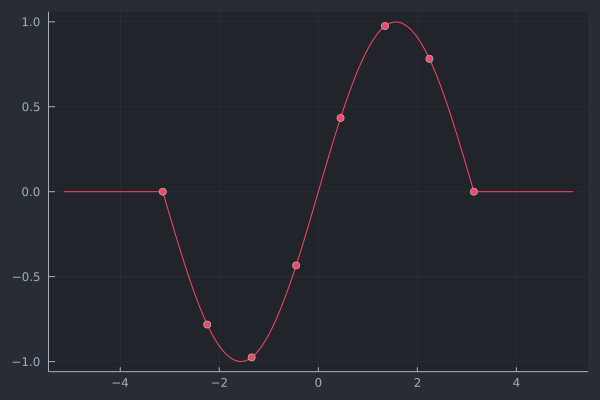

In [5]:
itp_flat = CubicSplineInterpolation(xs, A, extrapolation_bc=Flat());
plot(x_dense, itp_flat.(x_dense), label="")
scatter!(xs, A, label="", c=1)

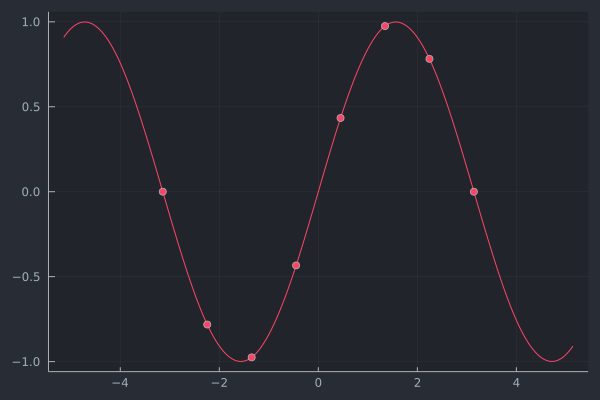

In [6]:
itp_periodic = CubicSplineInterpolation(xs, A, extrapolation_bc=Periodic());
plot(x_dense, itp_periodic.(x_dense), label="")
scatter!(xs, A, label="", c=1)

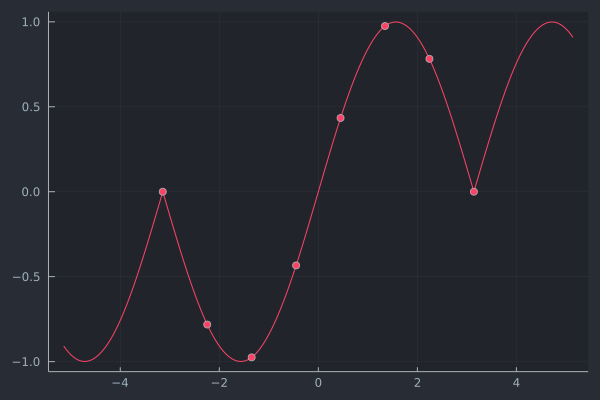

In [7]:
itp_reflect = CubicSplineInterpolation(xs, A, extrapolation_bc=Reflect());
plot(x_dense, itp_reflect.(x_dense), label="")
scatter!(xs, A, label="", c=1)

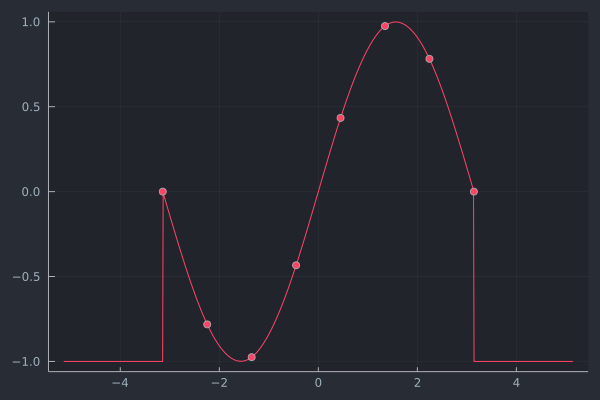

In [8]:
itp_constant = CubicSplineInterpolation(xs, A, extrapolation_bc=-1);
plot(x_dense, itp_constant.(x_dense), label="")
scatter!(xs, A, label="", c=1)

In [9]:
f(x,y) = log(x+y)
xs = 1:0.2:5
ys = 2:0.1:5
A = [f(x,y) for x in xs, y in ys]

# linear interpolation
interp_linear = LinearInterpolation((xs, ys), A, extrapolation_bc=Line())
interp_linear(3, 2) # exactly log(3 + 2)
interp_linear(5.1, 2.1) # approximately log(3.1 + 2.1)

1.9743814702692977

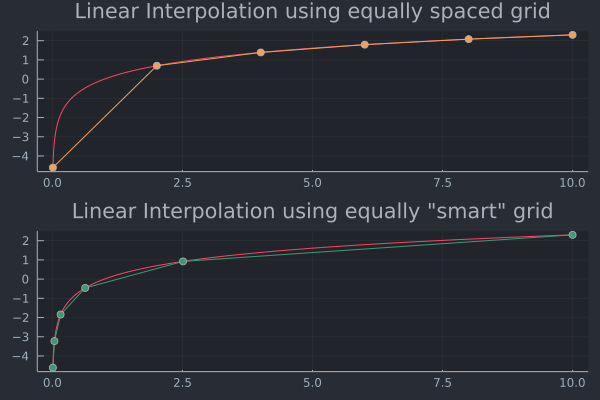

In [28]:
f(x) = log(x)
x_dense = 0.01:0.01:10
x_grid1 = range(0.01, stop=10, length=6)
x_grid2 = exp.(range(log(0.01), stop=log(10), length=6))

interp_1 = LinearInterpolation( x_grid1, f.(x_grid1),  extrapolation_bc=Line() )
interp_2 = LinearInterpolation( x_grid2, f.(x_grid2),  extrapolation_bc=Line() )

p1 = plot(x_dense, f.(x_dense), label="")
plot!(x_dense, interp_1.(x_dense), label="", c=2)
scatter!(x_grid1, f.(x_grid1), label="", c=2)
title!("Linear Interpolation using equally spaced grid")

p2 = plot(x_dense, f.(x_dense), label="")
plot!(x_dense, interp_2.(x_dense), label="", c=3)
scatter!(x_grid2, f.(x_grid2), label="", c=3)
title!("Linear Interpolation using equally \"smart\" grid")

plot(p1, p2, layout=(2,1))

In [27]:
interp_2(.01)

LoadError: BoundsError: attempt to access 6-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())), Throw()) with element type Float64 at index [0.01]